## P100_Classification of Machine Failure:

### Predict When The Machine is More Likely to Fail.

In [2]:
#importing libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")  # to ignore the warnings

In [3]:
#loading dataset
df=pd.read_excel("Maintenance.xlsx")

In [4]:
# To see the every columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
# Show the first five record
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1.0,M14860,M,298.1,308.6,1551.0,42.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,L47181,L,298.2,308.7,1408.0,46.3,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,L47182,L,298.1,308.5,1498.0,49.4,5.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,L47183,L,298.2,308.6,1433.0,39.5,7.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,L47184,L,298.2,308.7,1408.0,40.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# checking shape of dataset
df.shape

(10000, 14)

Inferences: We have 10000 rows and 14 columns.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  float64
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  float64
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  float64
 8   Machine failure          10000 non-null  float64
 9   TWF                      10000 non-null  float64
 10  HDF                      10000 non-null  float64
 11  PWF                      10000 non-null  float64
 12  OSF                      10000 non-null  float64
 13  RNF                      10000 non-null  float64
dtypes: float64(12), object(

In [8]:
# Checking null values
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

Infenrence: No NA values present in dataset.

In [9]:
# Checking Duplicates

#Count of duplicated rows
df[df.duplicated()].shape

(0, 14)

Inference: No duplicates present in dataset

In [10]:
# Droping unnecessary columns
df.drop(['UDI','Product ID'],axis=1,inplace=True)

In [11]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551.0,42.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,L,298.2,308.7,1408.0,46.3,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2,L,298.1,308.5,1498.0,49.4,5.0,0.0,0.0,0.0,0.0,0.0,0.0
3,L,298.2,308.6,1433.0,39.5,7.0,0.0,0.0,0.0,0.0,0.0,0.0
4,L,298.2,308.7,1408.0,40.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# rename the columns
df2 = df.rename({'Air temperature [K]':'air_t','Process temperature [K]':'process_t',
                 'Rotational speed [rpm]':'rotational','Torque [Nm]':'torque','Tool wear [min]':'tool_w',
                'Machine failure':'M_failure'}, axis=1)
df2.head()

,Type,air_t,process_t,rotational,torque,tool_w,M_failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551.0,42.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,L,298.2,308.7,1408.0,46.3,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2,L,298.1,308.5,1498.0,49.4,5.0,0.0,0.0,0.0,0.0,0.0,0.0
3,L,298.2,308.6,1433.0,39.5,7.0,0.0,0.0,0.0,0.0,0.0,0.0
4,L,298.2,308.7,1408.0,40.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0


## Outliers Removal Using Descriptive Stats
A commonly used rule says that a datapoint is an outliers if it is more then 1.5*IQR above the Third Quartile or Below the first Quartile

In [13]:
# Summary
df2.describe()

,air_t,process_t,rotational,torque,tool_w,M_failure,TWF,HDF,PWF,OSF,RNF
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


<AxesSubplot:xlabel='rotational', ylabel='Density'>

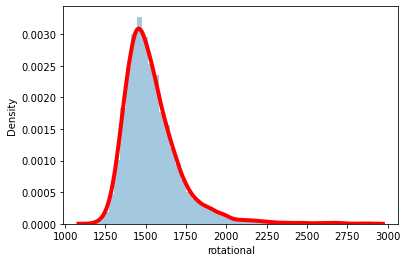

In [14]:
# distplot for rotational column
sns.distplot(df2['rotational'],kde_kws={'color':'r','linewidth':4,'alpha':1})

Inference: Look at the above distplot the dataset skewed on right side before removing outliers

## For rotatinal column
Using Box plots & IQR rule to Remove

<AxesSubplot:>

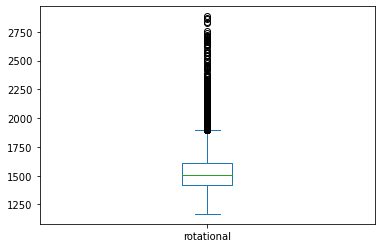

In [15]:
# Boxplot
df2.rotational.plot(kind='box')

Inference: From the Boxplot we can see there are outliers , & Calculated the upper extreme = 1895.5 so any datapoint above 1895.5 are outliers

In [16]:
#Original shape Before Outlier removal
df2.shape

(10000, 12)

In [17]:
# rotational More then 1895.5
len(df2[df2.rotational>1895.5])

418

In [18]:
#Removing Outliers 
df3 = df2[~(df2.rotational>1895.5)]
df3.shape

(9582, 12)

<AxesSubplot:xlabel='rotational', ylabel='Density'>

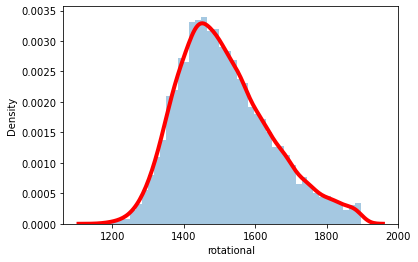

In [19]:
# distplot
sns.distplot(df3['rotational'],kde_kws={'color':'r','linewidth':4,'alpha':1})

Inference: Now we have removed the extreme observation look at the above graph its look like normal distribution

In [20]:
from scipy.stats import norm

<AxesSubplot:xlabel='rotational'>

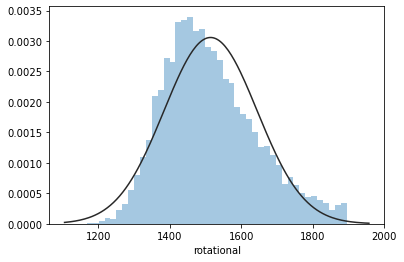

In [21]:
# Normal distplot
sns.distplot(df3['rotational'],fit=norm,kde=False)

Inference: Normal distribution graph for rotational column

<AxesSubplot:xlabel='torque', ylabel='Density'>

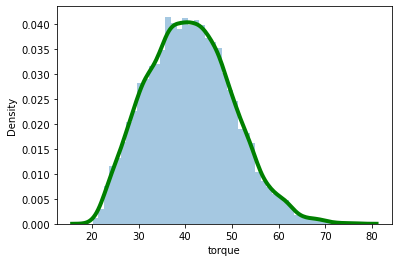

In [22]:
# distplot plot for torque column
sns.distplot(df3['torque'],kde_kws={'color':'g','linewidth':4,'alpha':1})

Inference: look at graph there is some extreme point present in torque column

# For torque column
Using Box plots & IQR rule to Remove

<AxesSubplot:>

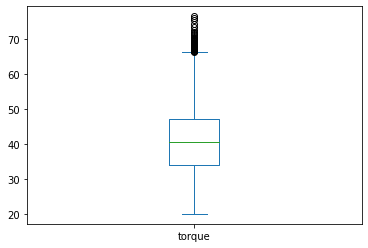

In [23]:
# boxplot
df3.torque.plot(kind='box')

Inference: From the Boxplot we can see there are outliers , & Calculated the upper extreme = 67.2 so any datapoint above 67.2 are outliers

In [24]:
# torque More then 67.2
len(df3[df3.torque>67.2])

40

In [25]:
df4=df3[~(df3.torque > 67.2)]
df4.shape

(9542, 12)

<AxesSubplot:xlabel='torque', ylabel='Density'>

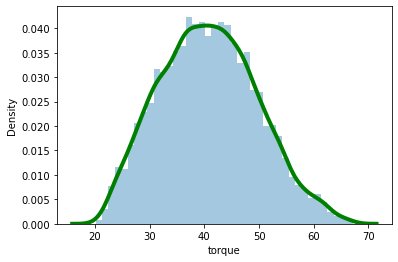

In [26]:
# distplot
sns.distplot(df4['torque'],kde_kws={'color':'g','linewidth':4,'alpha':1})

Inference: Now we have removed the extreme obs from torque column 

<AxesSubplot:xlabel='tool_w', ylabel='Density'>

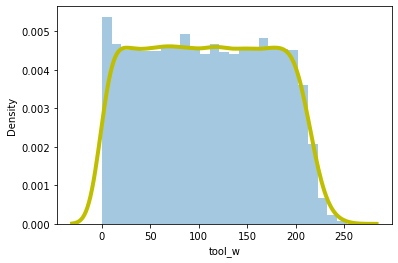

In [27]:
# distplot for tool_w column
sns.distplot(df4['tool_w'],kde_kws={'color':'y','linewidth':4,'alpha':1})

Inference: the torque column follow the normal distribution but it has negative kurtosis.

<AxesSubplot:xlabel='tool_w'>

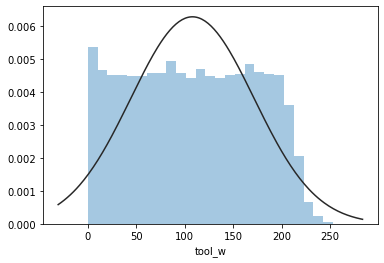

In [28]:
# normal distplot
sns.distplot(df4['tool_w'],fit=norm,kde=False)

Inference: normal distribution graph with negative kurtosis

## For tool_w column
Using Box plots & IQR rule to Remove

<AxesSubplot:>

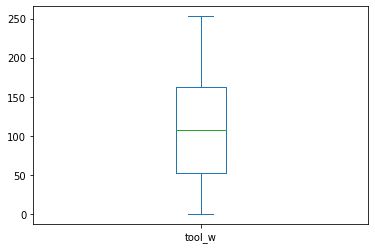

In [29]:
# Boxplot
df4.tool_w.plot(kind='box')

Inference: No outliers present in tool_w column

<AxesSubplot:>

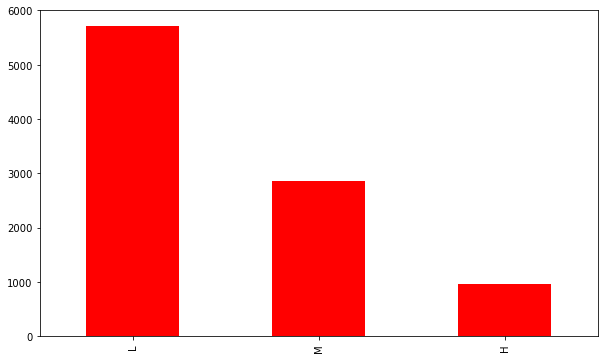

In [30]:
#Bar plot
plt.figure(figsize=(10,6))
df4['Type'].value_counts().plot.bar(color='r')

Inference: As mention in the data description 50% Low and 30% Medium and 20% High as product quality variants.

# Final Dataset After EDA

In [31]:
df4.head(3)

,Type,air_t,process_t,rotational,torque,tool_w,M_failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551.0,42.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,L,298.2,308.7,1408.0,46.3,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2,L,298.1,308.5,1498.0,49.4,5.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
# let's encode the Type to numerical values

df4['Type'] = df4['Type'].replace(('M','L','H'),(2,1,3))

In [33]:
df4.head()

,Type,air_t,process_t,rotational,torque,tool_w,M_failure,TWF,HDF,PWF,OSF,RNF
0,2,298.1,308.6,1551.0,42.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,298.2,308.7,1408.0,46.3,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,298.1,308.5,1498.0,49.4,5.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,298.2,308.6,1433.0,39.5,7.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,298.2,308.7,1408.0,40.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0



___Class variable counts___

Percentage of machine failure
0.0    97.191364
1.0     2.808636
Name: M_failure, dtype: float64


Text(0.5, 1.02, 'Count of TARGET Variable (Machine failed Y/N)')

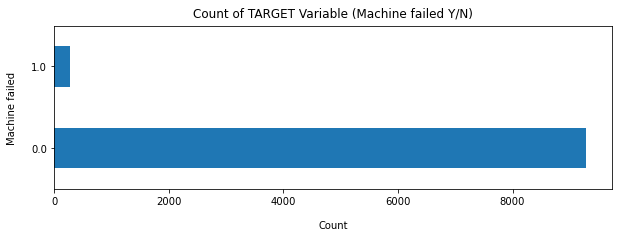

In [34]:
target_val_count = df4.M_failure.value_counts()
#print(target_val_count)

# % of machine failure

print('Percentage of machine failure')
print(100*target_val_count/len(df4['M_failure']))

# plot target/response variable count

df4['M_failure'].value_counts().plot(kind='barh', figsize=(10, 3))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Machine failed", labelpad=14)
plt.title("Count of TARGET Variable (Machine failed Y/N)", y=1.02)

#### Feature Scaling- standardization

In [35]:
# Spliting X & Y Variable

x = df4.drop(['M_failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis = 1)
y = df4['M_failure']

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
scaler = MinMaxScaler()
scaler.fit(x)
scaled_data = scaler.transform(x)


x = pd.DataFrame(data = scaled_data, columns = x.columns, index = x.index)
x.head(10)

,Type,air_t,process_t,rotational,torque,tool_w
0,0.5,0.304348,0.358025,0.526823,0.481953,0.000000
1,0.0,0.315217,0.370370,0.330124,0.556263,0.011858
2,0.0,0.304348,0.345679,0.453920,0.622081,0.019763
3,0.0,0.315217,0.358025,0.364512,0.411890,0.027668
4,0.0,0.315217,0.370370,0.330124,0.422505,0.035573
5,0.5,0.304348,0.358025,0.353508,0.462845,0.043478
6,0.0,0.304348,0.358025,0.536451,0.473461,0.055336
7,0.0,0.304348,0.358025,0.493810,0.426752,0.063241
8,0.5,0.326087,0.370370,0.686382,0.180467,0.071146
9,0.5,0.347826,0.407407,0.788171,0.167728,0.083004


# Feature Engineering

### Univariate Feature Selection

In [38]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [39]:
# apply SelectKBest class to extract top 10 best features

bestfeatures = SelectKBest(score_func=chi2, k=6)
fit = bestfeatures.fit(x, y)

featureScores_univ = pd.DataFrame({'variables':x.columns, 'Score':fit.scores_})
featureScores_univ.sort_values(by=['Score'], ascending=False)

,variables,Score
4,torque,39.013152
5,tool_w,19.810993
3,rotational,18.960673
1,air_t,7.440851
0,Type,5.649607
2,process_t,0.958917


High chi2 value suggest, feature is useful in predicting the class variable

### Feature Importance By Decision Tree

In [43]:
from sklearn.ensemble import ExtraTreesClassifier
#from sklearn.ensemble import DecisionTreeClassifier
import matplotlib.pyplot as plt

[0.03706451 0.17006663 0.14245626 0.1931404  0.24418038 0.21309181]


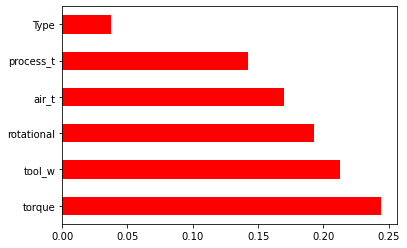

In [44]:
# use inbuilt class feature_importances of tree based classifiers
model = ExtraTreesClassifier()
model.fit(x, y)
print(model.feature_importances_)

# plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(11).plot(kind='barh', color='r')
plt.show()

In [46]:
featureScores_dt = pd.DataFrame({'variables':x.columns, 'Score':model.feature_importances_})
featureScores_dt.sort_values(by=['Score'], ascending=False)

,variables,Score
4,torque,0.244180
5,tool_w,0.213092
3,rotational,0.193140
1,air_t,0.170067
2,process_t,0.142456
0,Type,0.037065


### Recursive Feature Elimination

In [47]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [48]:
# feature extraction with RFE

model = LogisticRegression(max_iter=2500)
rfe = RFE(model, n_features_to_select=4)
fit = rfe.fit(x, y)

fit.n_features_

4

In [49]:
fit.support_

array([False,  True,  True, False,  True,  True])

In [50]:
# Feature Ranking
fit.ranking_

array([3, 1, 1, 2, 1, 1])

In [52]:
featureScores_rfe = pd.DataFrame({'variables':x.columns, 'Rankings':fit.ranking_})
featureScores_rfe.sort_values(by=['Rankings'])

,variables,Rankings
1,air_t,1
2,process_t,1
4,torque,1
5,tool_w,1
3,rotational,2
0,Type,3


___By considering all 3 feature selection techniques 'product type' looks less useful in predicting the 
target variable among all predictors.
Out of 3 techniques in univarient and decision tree 'Type' is at bottom of prediction score by decision tree 
and RFE, and of 2nd least score in univarient___

In [53]:
x.drop(['Type'], axis=1, inplace=True)
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9542 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   air_t       9542 non-null   float64
 1   process_t   9542 non-null   float64
 2   rotational  9542 non-null   float64
 3   torque      9542 non-null   float64
 4   tool_w      9542 non-null   float64
dtypes: float64(5)
memory usage: 447.3 KB


## Stratified sampling for class balance on the train and test dataset
 Create a stratified train/test split. 
 Test set will be 30% of the data.
 Class distribution will be equal for train test and original data

In [61]:
from sklearn.model_selection import train_test_split

In [63]:
#train, test = train_test_split(data, test_size = 0.3, stratify=data.buy)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, stratify=y)

0.0    6491
1.0     188
Name: M_failure, dtype: int64
Percentage of machine failure
0.0    97.185207
1.0     2.814793
Name: M_failure, dtype: float64


Text(0.5, 1.02, 'Class distribution in train data')

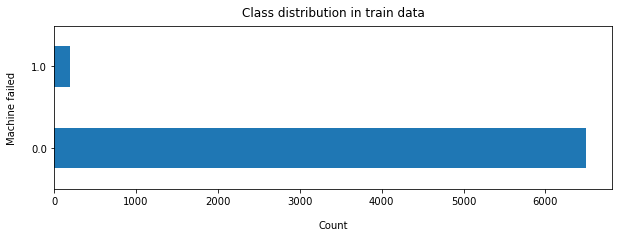

In [163]:
target_val_count = y_train.value_counts()
print(target_val_count)

# % of machine failure

print('Percentage of machine failure')
print(100*target_val_count/len(y_train))
# plot target/response variable count

y_train.value_counts().plot(kind='barh', figsize=(10, 3))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Machine failed", labelpad=14)
plt.title("Class distribution in train data", y=1.02)

0.0    2783
1.0      80
Name: M_failure, dtype: int64
Percentage of machine failure
0.0    97.205728
1.0     2.794272
Name: M_failure, dtype: float64


Text(0.5, 1.02, 'Class distribution in test data')

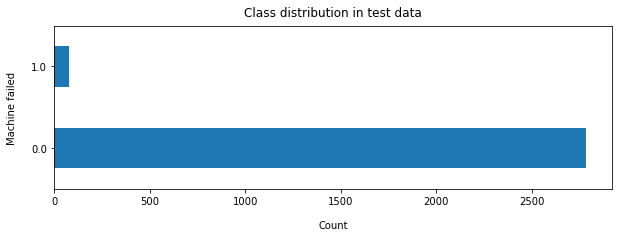

In [162]:
target_val_count = y_test.value_counts()
print(target_val_count)

# % of machine failure

print('Percentage of machine failure')
print(100*target_val_count/len(y_test))
# plot target/response variable count

y_test.value_counts().plot(kind='barh', figsize=(10, 3))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Machine failed", labelpad=14)
plt.title("Class distribution in test data", y=1.02)

# Different Model Building For Classification

1. Random Forest Classification
2. AdaBoost Classification
3. Logistic Regression
4. K Nearest Neighbour
5. Support Vector Machine (SVM) Classifier
6. Stacking Ensemble for Classification

#### 1. Random Forest Classification

In [76]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [55]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [56]:
num_trees = 100
# max features: sqrt(n_features)
max_features = 3

kfold = KFold(n_splits=10, shuffle=True, random_state=42)
model_RFC = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results_RFC = cross_val_score(model_RFC, x, y, cv=kfold, scoring="accuracy")

print(f'Scores for each fold are: {results_RFC}')
print(f'Average score: {"{:.2f}".format(results_RFC.mean())}')

Scores for each fold are: [0.99057592 0.98743455 0.98008386 0.99056604 0.99056604 0.99266247
 0.98637317 0.98113208 0.98322851 0.98637317]
Average score: 0.99


In [153]:
# model fit and validate

model_RFC.fit(x_train, y_train)
preds = model_RFC.predict(x_test)

In [154]:
print('Classification report for Random Forest model')
f1_rfc = f1_score(y_test, preds)
precision_rfc = precision_score(y_test, preds)
recall_rfc = recall_score(y_test, preds)

print('F1 is: ', f1_rfc)
print('Precision is: ', precision_rfc)
print('Recall is: ', recall_rfc)

Classification report for Random Forest model
F1 is:  0.7692307692307692
Precision is:  0.873015873015873
Recall is:  0.6875


#### 2. AdaBoost Classification

In [80]:
from sklearn.ensemble import AdaBoostClassifier

In [81]:
num_trees = 100
seed = 7

kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
model_AdB = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results_AdB = cross_val_score(model_AdB, x, y, cv=kfold, scoring="accuracy")

print(results_AdB.mean())

0.9731718748284983


In [150]:
# model fit and validate

model_AdB.fit(x_train, y_train)
preds = model_AdB.predict(x_test)

In [152]:
f1_adb = f1_score(y_test, preds)
precision_adb = precision_score(y_test, preds)
recall_adb = recall_score(y_test, preds)

print('F1 is: ', f1_adb)
print('Precision is: ', precision_adb)
print('Recall is: ', recall_adb)

F1 is:  0.42962962962962964
Precision is:  0.5272727272727272
Recall is:  0.3625


#### 3. Logistic Regression

In [87]:

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
model_LR = LogisticRegression(random_state= 42)
results_LR = cross_val_score(model_LR, x, y, cv= kfold, scoring="accuracy")

print(f'Scores for each fold are: {results_LR}')
print(f'Average score: {"{:.2f}".format(results_LR.mean())}')

Scores for each fold are: [0.97433211 0.96909377 0.97589099 0.97379455 0.97222222]
Average score: 0.97


In [148]:
# model fit and validate

model_LR.fit(x_train, y_train)
preds = model_LR.predict(x_test)

In [149]:
print('Classification report for Logistic Regression model')
f1_LR = f1_score(y_test, preds)
precision_LR = precision_score(y_test, preds)
recall_LR = recall_score(y_test, preds)

print('F1 is: ', f1_LR)
print('Precision is: ', precision_LR)
print('Recall is: ', recall_LR)

Classification report for Logistic Regression model
F1 is:  0.07228915662650602
Precision is:  1.0
Recall is:  0.0375


#### 4. K Nearest Neighbour

In [90]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [91]:
# Grid Search for Algorithm Tuning

n_neighbors = np.array(range(1,50))
param_grid = dict(n_neighbors=n_neighbors)

model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(x, y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [92]:
print(grid.best_score_)
print(grid.best_params_)

0.9719136321056718
{'n_neighbors': 48}


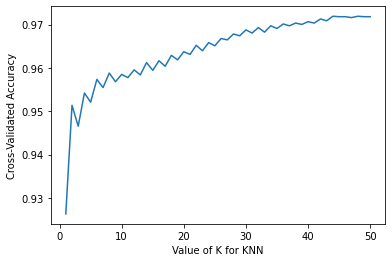

In [93]:
# Visualizing the CV results

k_range = range(1, 51)
k_scores = []

# Use iteration to caclulator different K in models, 
# then return the average accuracy based on the cross validation

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=5)
    k_scores.append(scores.mean())
    
# Plot to see clearly

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [94]:
# Model with tuned parameters, balanced data

model_KNN = KNeighborsClassifier(n_neighbors=48)
results_KNN = cross_val_score(model_KNN, x, y, cv=kfold, scoring="accuracy")

print(results_KNN.mean())

0.972333084045232


In [146]:
model_KNN.fit(x_train, y_train)
preds = model_KNN.predict(x_test)

In [147]:
print('Classification report for K Nearest Neighbour model')
f1_KNN = f1_score(y_test, preds)
precision_KNN = precision_score(y_test, preds)
recall_KNN = recall_score(y_test, preds)

print('F1 is: ', f1_KNN)
print('Precision is: ', precision_KNN)
print('Recall is: ', recall_KNN)

Classification report for K Nearest Neighbour model
F1 is:  0.0
Precision is:  0.0
Recall is:  0.0


#### 5. Support Vector Machine (SVM) Classifier

In [118]:
from sklearn import svm

In [119]:
# Grid Search/hyper parameter Tuning

model = svm.SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,10,0.1,0.001] }]
gsv = GridSearchCV(model, param_grid, cv=10)
gsv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15], 'gamma': [50], 'kernel': ['rbf']}])

In [120]:
gsv.best_params_ , gsv.best_score_ 

({'C': 15, 'gamma': 50, 'kernel': 'rbf'}, 0.9724501521694243)

In [121]:
# Model with parameters from grid search

kfold = KFold(n_splits=10, shuffle=True, random_state=42)
model_SVM = svm.SVC(C= 15, gamma = 50)
results_SVM = cross_val_score(model_SVM, x, y, cv=kfold, scoring="accuracy")

print(results_SVM.mean())

0.9788308252933365


In [155]:
model_SVM.fit(x_train, y_train)
preds = model_SVM.predict(x_test)

In [156]:
print('Classification report for SVM model')
f1_SVM = f1_score(y_test, preds)
precision_SVM = precision_score(y_test, preds)
recall_SVM = recall_score(y_test, preds)

print('F1 is: ', f1_SVM)
print('Precision is: ', precision_SVM)
print('Recall is: ', recall_SVM)

Classification report for SVM model
F1 is:  0.6293706293706294
Precision is:  0.7142857142857143
Recall is:  0.5625


#### 6. Stacking Ensemble for Classification

In [113]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier

In [114]:
kfold = KFold(n_splits=10, shuffle=True, random_state=7)

# create the sub models
estimators = []
model1 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = KNeighborsClassifier(n_neighbors=17)
estimators.append(('knn', model3))

model4 = RandomForestClassifier(n_estimators=100, max_features=5)
estimators.append(('rfc', model4))
model5 = AdaBoostClassifier(n_estimators=100, random_state=7)
estimators.append(('adb', model5))

# create the ensemble model
ensemble_stack = VotingClassifier(estimators)
results_stcking = cross_val_score(ensemble_stack, x, y, cv=kfold, scoring="accuracy")

print(results_stcking.mean())
#print(results_stcking.itemset())


0.9784112087984458


In [142]:
ensemble_stack.fit(x_train, y_train)
preds = ensemble_stack.predict(x_test)

In [143]:
print('Classification report for Stacking Ensemble model')
f1_stacking = f1_score(y_test, preds)
precision_stacking = precision_score(y_test, preds)
recall_stacking = recall_score(y_test, preds)

print('F1 is: ', f1_stacking)
print('Precision is: ', precision_stacking)
print('Recall is: ', recall_stacking)

Classification report for Stacking Ensemble model
F1 is:  0.39999999999999997
Precision is:  0.84
Recall is:  0.2625


## Models Evaluation

In [157]:
# Storing results in a data frame

d1 = {'Models':['Random Forest','Ada Boost','Logistic Regression','KNN','SVM',
                'Stacking ensemble'], 
      'Accuracy':[results_RFC.mean(), results_AdB.mean(), results_LR.mean(), results_KNN.mean(), results_SVM.mean(), 
             results_stcking.mean()],
     'F1_Score':[f1_rfc, f1_adb, f1_LR, f1_KNN, f1_SVM, f1_stacking],
     'Precision':[precision_rfc, precision_adb, precision_LR, precision_KNN, precision_SVM, precision_stacking],
     'Recall':[recall_rfc, recall_adb, recall_LR, recall_KNN, recall_SVM, recall_stacking]}
results_df = pd.DataFrame(d1)
results_df.sort_values(by=['Accuracy'], ascending=False)

,Models,Accuracy,F1_Score,Precision,Recall
0,Random Forest,0.986900,0.769231,0.873016,0.6875
4,SVM,0.978831,0.629371,0.714286,0.5625
5,Stacking ensemble,0.978411,0.400000,0.840000,0.2625
1,Ada Boost,0.973172,0.429630,0.527273,0.3625
2,Logistic Regression,0.973067,0.072289,1.000000,0.0375
3,KNN,0.972333,0.000000,0.000000,0.0000


__Random forest model is giving us the highest accuracy and high precision, recall hence high f1 score among all the models
built. validated by k-fold cross validation, which has reduced bias, 
also validated by balanced sampling of test and train dataset, we will deploy the Random forest model__

### finalized model, Random Forest 

In [158]:
import joblib

In [159]:
x1 = df4.drop(['Type', 'M_failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis = 1)
x1.head()

,air_t,process_t,rotational,torque,tool_w
0,298.1,308.6,1551.0,42.8,0.0
1,298.2,308.7,1408.0,46.3,3.0
2,298.1,308.5,1498.0,49.4,5.0
3,298.2,308.6,1433.0,39.5,7.0
4,298.2,308.7,1408.0,40.0,9.0


### Save the model for deployment

In [160]:
# Save the Scaler
scaler = MinMaxScaler()
scaler.fit(x1)

filename = 'scaler_model.sav'
joblib.dump(scaler, filename)

['scaler_model.sav']

In [161]:
# Save the model
filename = 'finalized_model.sav'
joblib.dump(model_RFC, filename)

['finalized_model.sav']